# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [281]:
# Business Objective

# Our goal is to understand what factors make a car more or less expensive. 
# As a result of our analysis, we should be able to provide clear recommendations to our client as to what consumers value in a used car.

In [283]:
# Assess Situation

# We have a dataset that contains information on 426K used cars
# We assume that this dataset has sufficient amount variation in the data terms of year, make, model etc.

In [285]:
# Determine Data Mining Goals

# Our goal is it expore provided dataset, connect the dots, gain insights and select the right features
# Our success creiteria is 

In [287]:
# Produce Project Plan

# We plan to first understand the dataset, then perform any required data clearing tasks
# After we clean the dataset our goal is to select the right model and then train and evaluate the model for final review.
# After successful evaluation we would deploy the model

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [290]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pylab as pl
import seaborn as sns
from scipy import stats

In [292]:
org_dataset = pd.read_csv('data/vehicles.csv')

In [293]:
org_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [294]:
org_dataset.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


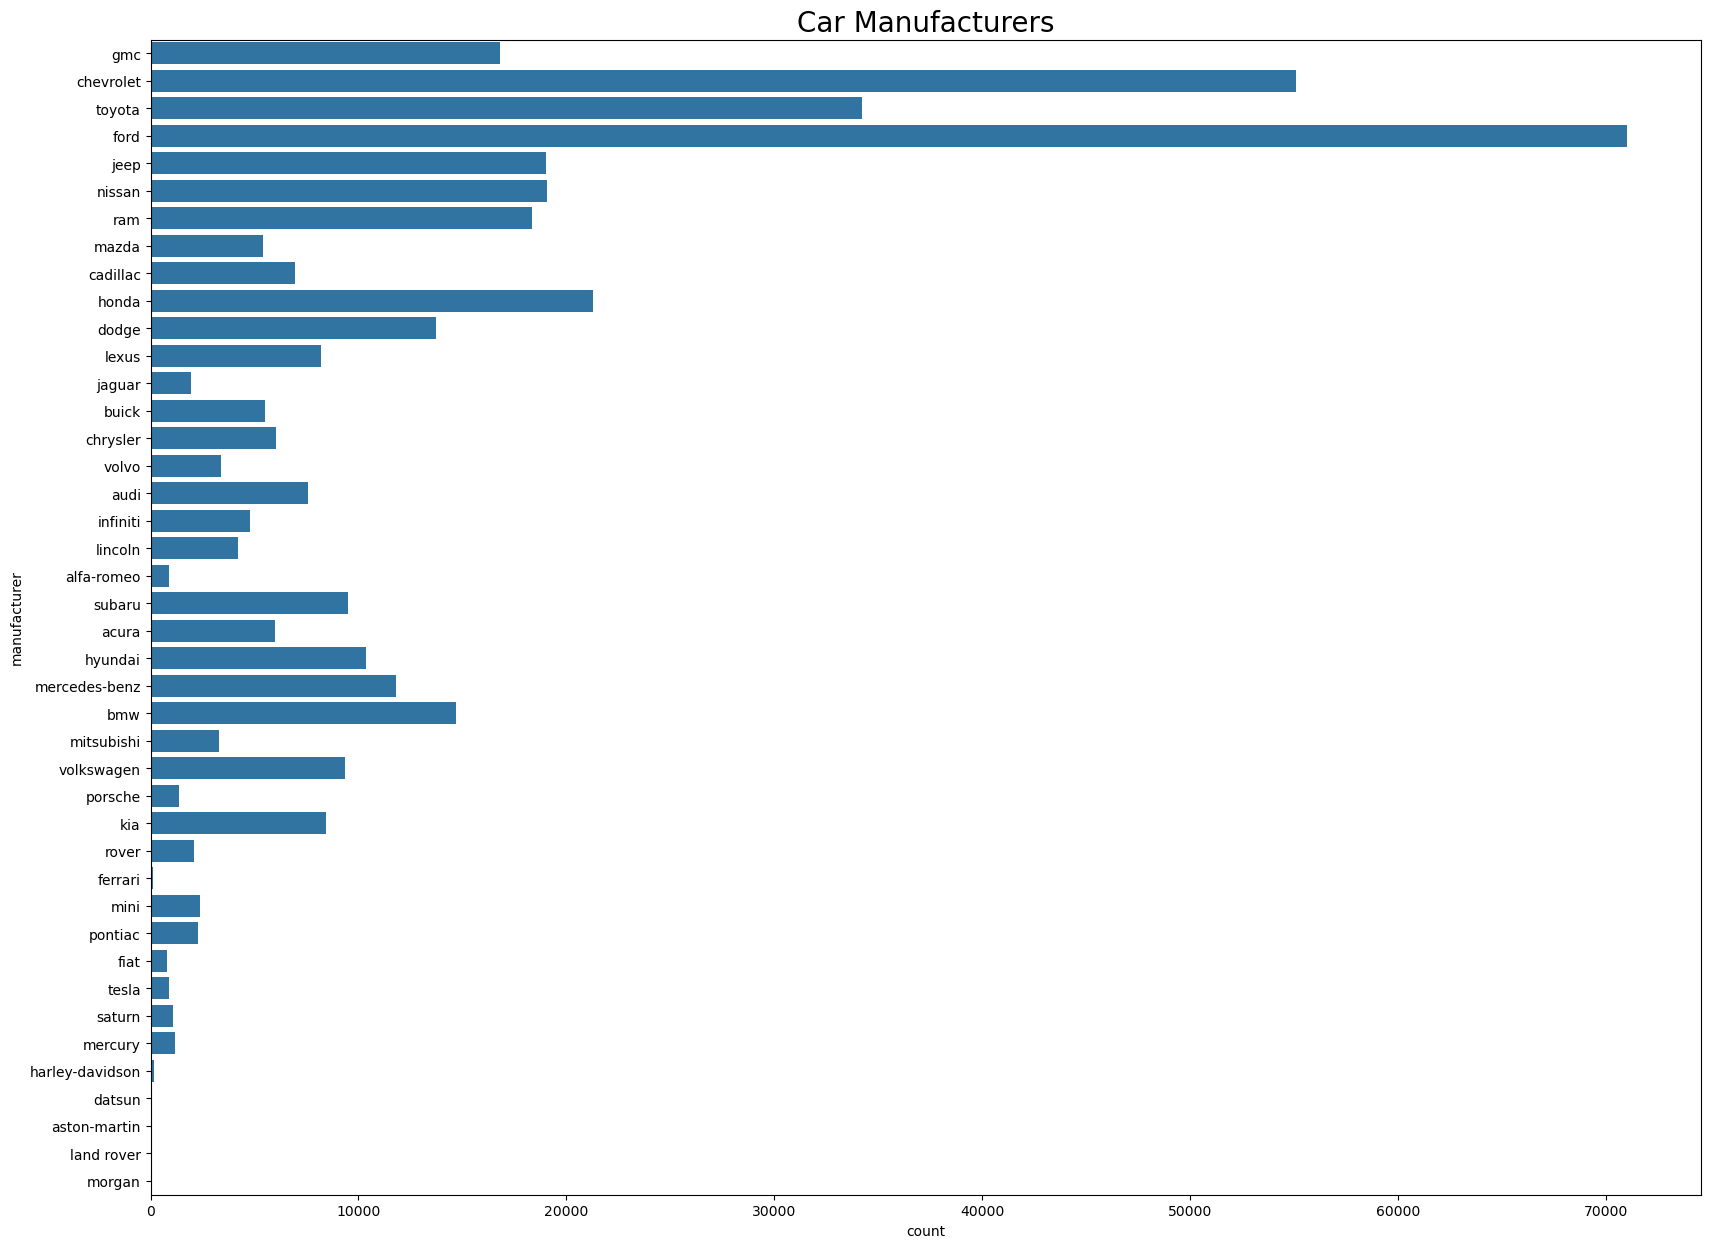

In [295]:
plt.figure(figsize = (20, 15))
sns.countplot(y = org_dataset.manufacturer)
plt.title("Car Manufacturers", fontsize = 20)
plt.show()

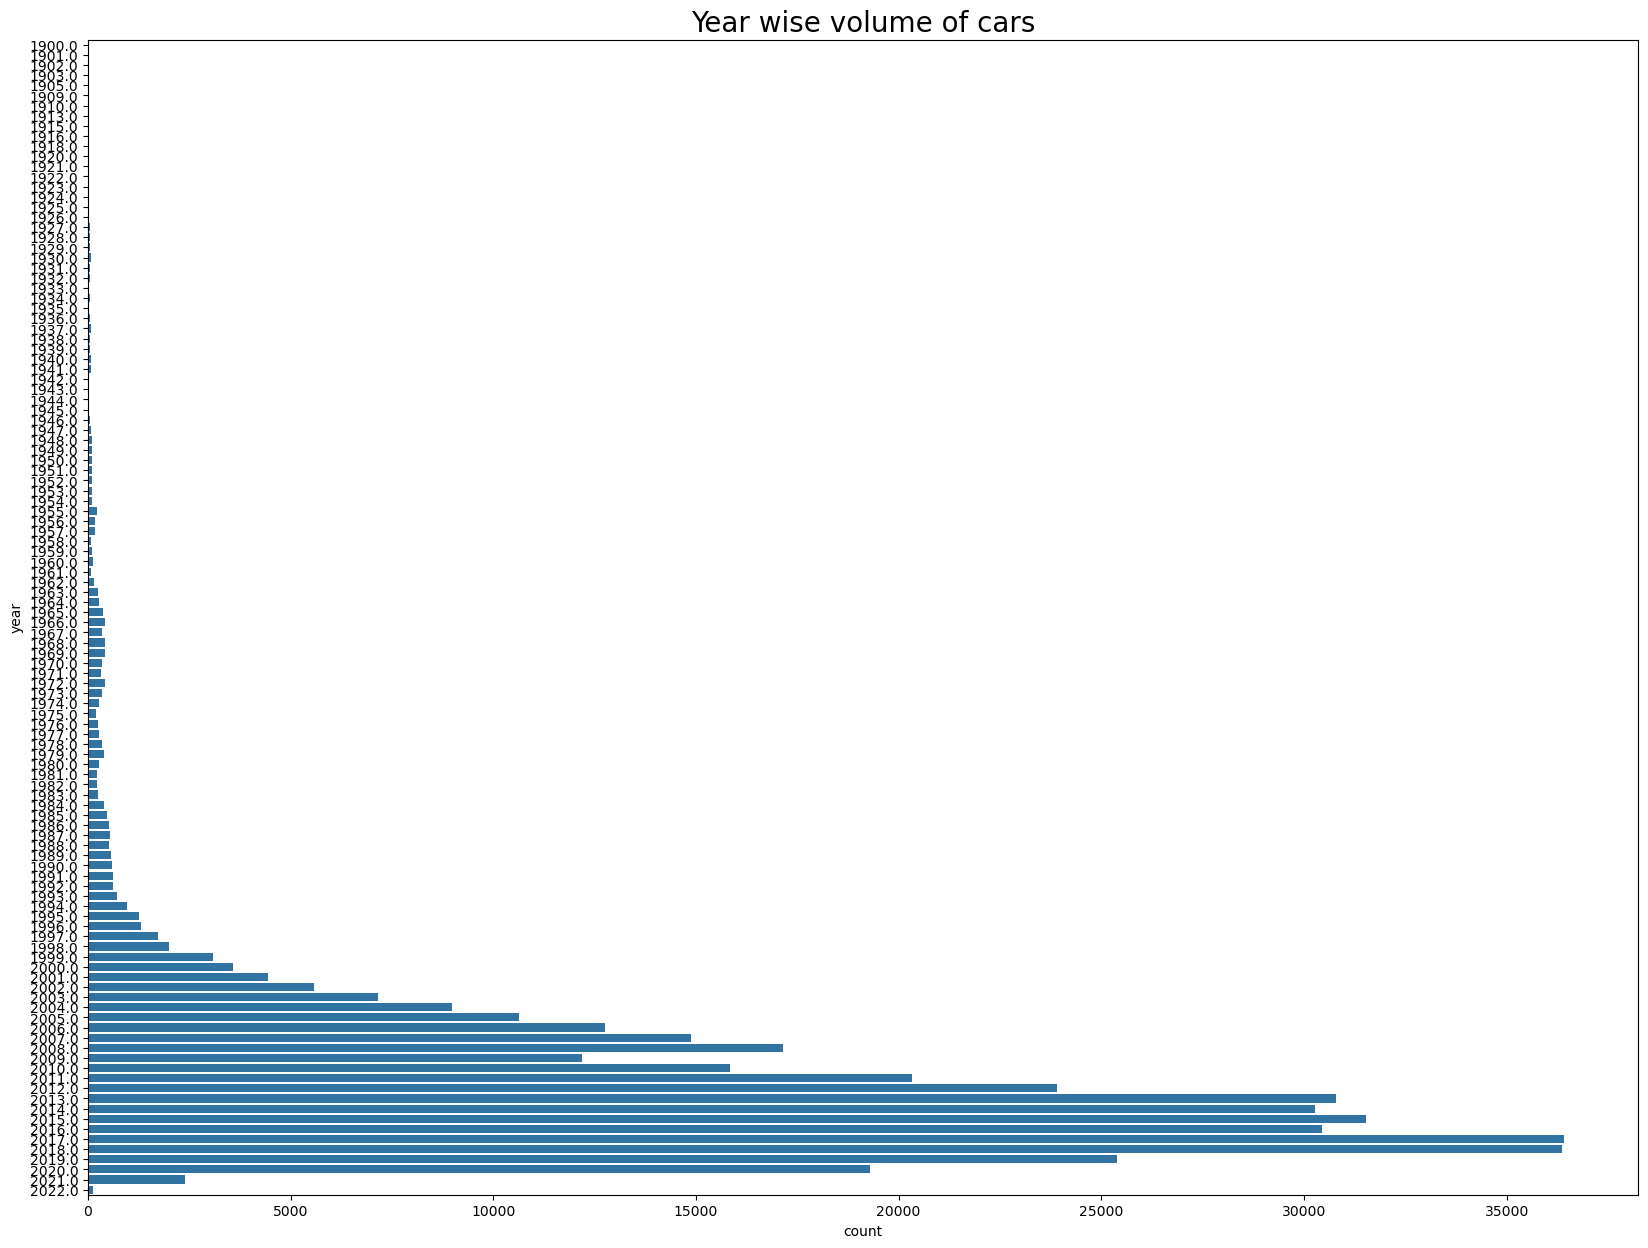

In [297]:
plt.figure(figsize = (20, 15))
sns.countplot( y = org_dataset.year)
plt.title("Year wise volume of cars", fontsize = 20)
plt.show()

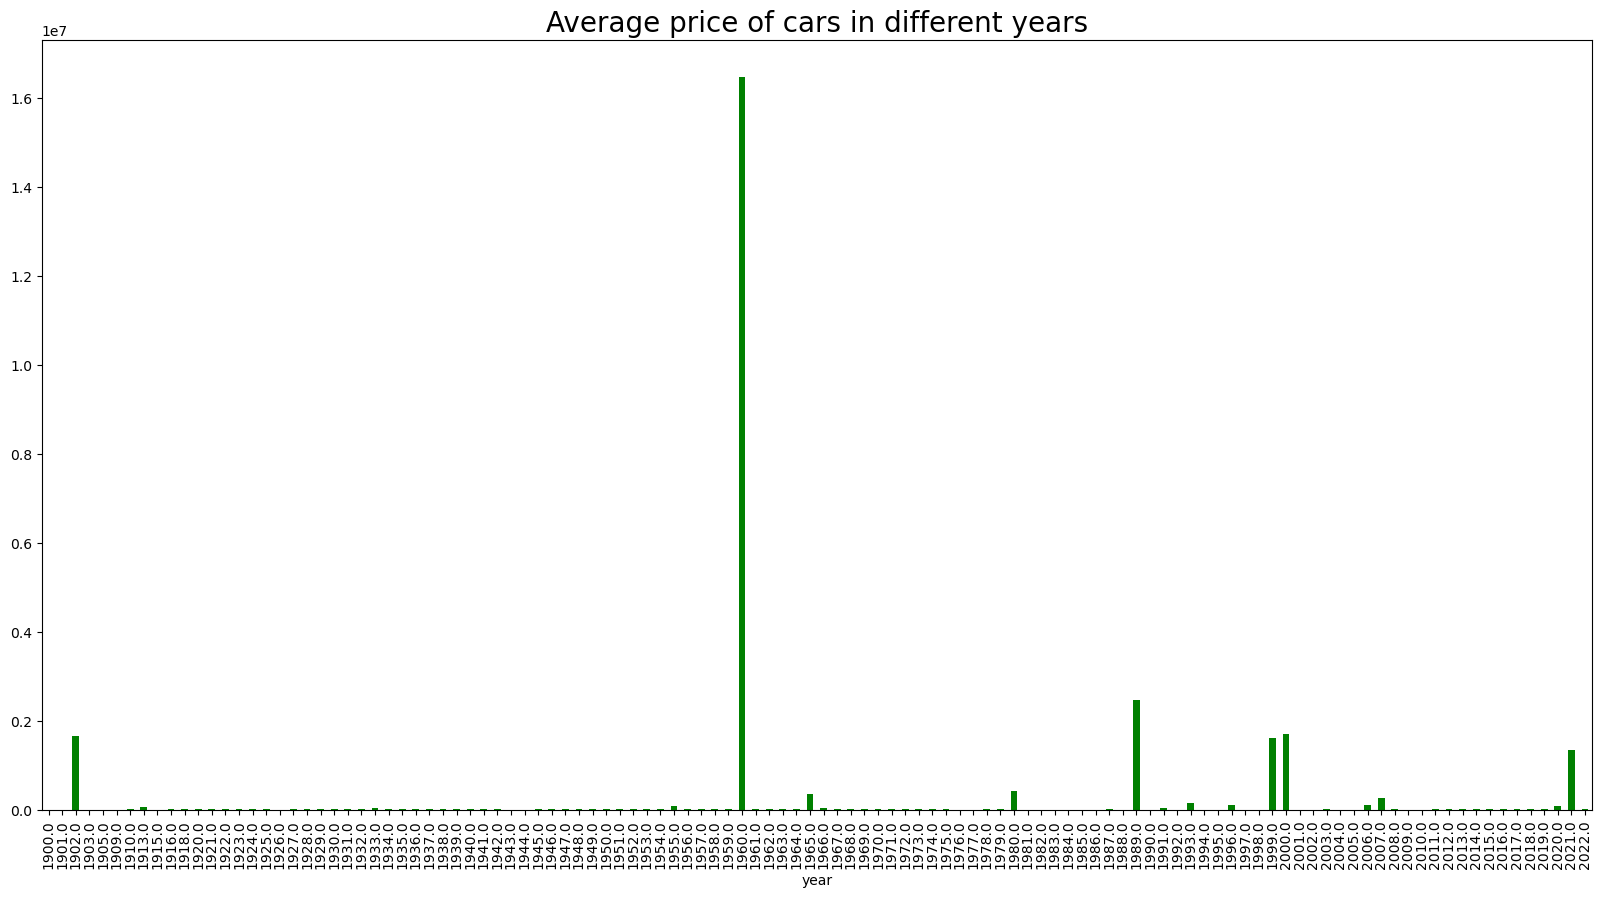

In [300]:
plt.figure(figsize = (20, 10))
org_dataset.groupby('year')['price'].mean().plot(kind = 'bar', color = 'g')
plt.title("Average price of cars in different years", fontsize = 20)
plt.show()

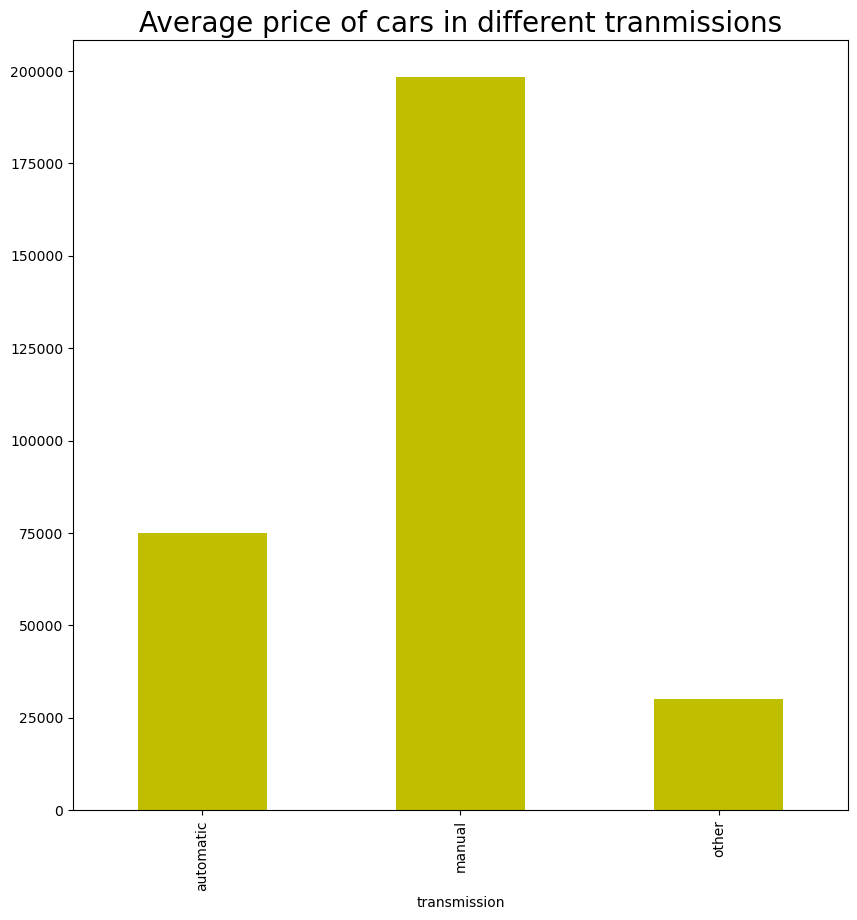

In [301]:
plt.figure(figsize = (10, 10))
org_dataset.groupby('transmission')['price'].mean().plot(kind = 'bar', color = 'y')
plt.title("Average price of cars in different tranmissions", fontsize = 20)
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [304]:
org_dataset['region'] = org_dataset['region'].astype('string')
org_dataset['manufacturer'] = org_dataset['manufacturer'].astype('string')
org_dataset['model'] = org_dataset['model'].astype('string')
org_dataset['condition'] = org_dataset['condition'].astype('string')
org_dataset['cylinders'] = org_dataset['cylinders'].astype('string')
org_dataset['fuel'] = org_dataset['fuel'].astype('string')
org_dataset['title_status'] = org_dataset['title_status'].astype('string')
org_dataset['transmission'] = org_dataset['transmission'].astype('string')
org_dataset['drive'] = org_dataset['drive'].astype('string')
org_dataset['size'] = org_dataset['size'].astype('string')
org_dataset['type'] = org_dataset['type'].astype('string')
org_dataset['paint_color'] = org_dataset['paint_color'].astype('string')
org_dataset['state'] = org_dataset['state'].astype('string')


In [309]:
(org_dataset.isna().mean() * 100).round(2).sort_values(ascending=False)

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
id               0.00
region           0.00
price            0.00
state            0.00
dtype: float64

In [311]:
org_dataset.duplicated()
org_dataset.duplicated().sum()

0

In [312]:
org_dataset_clean = org_dataset.drop({'id', 'VIN', 'region', 'model'}, axis=1)

org_dataset_clean['condition'] = org_dataset_clean['condition'].fillna('unknown_condition')
org_dataset_clean['cylinders'] = org_dataset_clean['cylinders'].fillna('unknown_cylinders')
org_dataset_clean['fuel'] = org_dataset_clean['fuel'].fillna('unknown_fuel')
org_dataset_clean['title_status'] = org_dataset_clean['title_status'].fillna('unknown_title_status')
org_dataset_clean['transmission'] = org_dataset_clean['transmission'].fillna('unknown_transmission')
org_dataset_clean['drive'] = org_dataset_clean['drive'].fillna('unknown_drive')
org_dataset_clean['size'] = org_dataset_clean['size'].fillna('unknown_size')
org_dataset_clean['type'] = org_dataset_clean['type'].fillna('unknown_type')
org_dataset_clean['paint_color'] = org_dataset_clean['paint_color'].fillna('unknown_paint_color')

#remove rows with missing price
org_dataset_clean = org_dataset_clean[org_dataset_clean['price'] != 0]

#remove rows with missing year & manufacturer 
org_dataset_clean = org_dataset_clean.dropna(subset=['year', 'manufacturer'], how='any')

#drop missing values
org_dataset_clean.dropna(inplace=True)

#drop duplicates
org_dataset_clean.drop_duplicates(inplace=True)

In [314]:
org_dataset_clean.isna().mean() * 100

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [317]:
org_dataset_clean.duplicated().sum()

0

In [319]:
org_dataset_clean.to_csv('filename.csv', index=False)
org_dataset_clean.count()


price           263438
year            263438
manufacturer    263438
condition       263438
cylinders       263438
fuel            263438
odometer        263438
title_status    263438
transmission    263438
drive           263438
size            263438
type            263438
paint_color     263438
state           263438
dtype: int64

In [321]:
org_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263438 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         263438 non-null  int64  
 1   year          263438 non-null  float64
 2   manufacturer  263438 non-null  string 
 3   condition     263438 non-null  string 
 4   cylinders     263438 non-null  string 
 5   fuel          263438 non-null  string 
 6   odometer      263438 non-null  float64
 7   title_status  263438 non-null  string 
 8   transmission  263438 non-null  string 
 9   drive         263438 non-null  string 
 10  size          263438 non-null  string 
 11  type          263438 non-null  string 
 12  paint_color   263438 non-null  string 
 13  state         263438 non-null  string 
dtypes: float64(2), int64(1), string(11)
memory usage: 30.1 MB


In [323]:
org_dataset_clean['year'] = org_dataset_clean['year'].astype('int')
org_dataset_clean['odometer'] = org_dataset_clean['odometer'].astype('int')

Text(0.5, 0.98, 'Year left skewed')

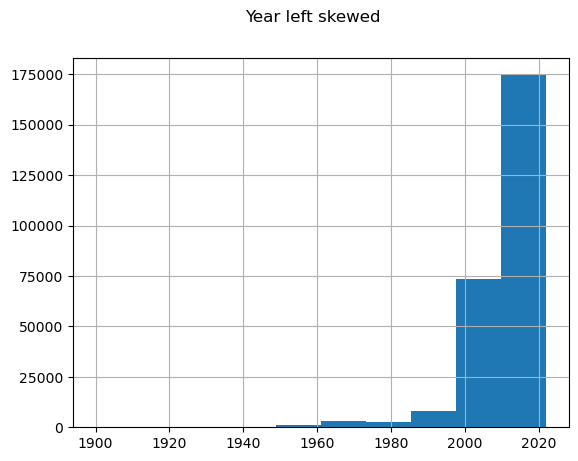

In [325]:
org_dataset_clean['year'].hist()
pl.suptitle("Year left skewed")

Text(0.5, 0.98, 'Price right skewed')

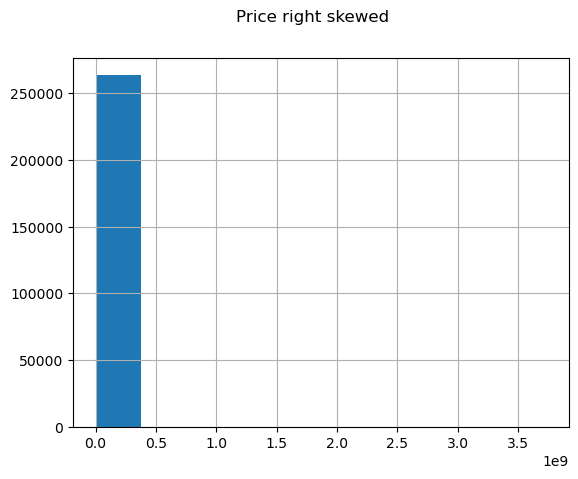

In [327]:
org_dataset_clean['price'].hist()
pl.suptitle("Price right skewed")

#org_dataset_clean.boxplot(by='price')

In [329]:
pl.suptitle("Remove otliers since in price")

def remove_outliers_zscore(df, column):
    """Removes outliers from a DataFrame column using the Z-Score method."""

    z_scores = stats.zscore(df[column])
    return df[(z_scores < 3) & (z_scores > -3)]

def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method."""

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(Q1)
    print(Q3)
   
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#org_dataset_price_clean = remove_outliers_zscore(org_dataset_clean, 'price')

org_dataset_price_clean = org_dataset_clean[org_dataset_clean['price']>=1000]
org_dataset_price_clean = org_dataset_price_clean[org_dataset_price_clean['price']<=200000]

org_dataset_price_clean.to_csv('my_data.csv', index=False)

<Figure size 640x480 with 0 Axes>

In [330]:
std = org_dataset_price_clean['year'].std() 
mean = org_dataset_price_clean['year'].mean()

print(std, mean)

org_dataset_year_clean = org_dataset_price_clean[org_dataset_clean['year']>= mean-2*std]


9.955223587245833 2010.3473625798183


C:\Users\r_bho\AppData\Local\Temp\ipykernel_11256\653094378.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  org_dataset_year_clean = org_dataset_price_clean[org_dataset_clean['year']>= mean-2*std]


In [333]:
std = org_dataset_year_clean['odometer'].std() 
mean = org_dataset_year_clean['odometer'].mean()

print(std, mean)

org_dataset_odometer_clean = org_dataset_year_clean[org_dataset_year_clean['odometer']<= mean+2*std]

dataset_clean = org_dataset_odometer_clean

131249.31451752933 100709.20149396046


Text(0.5, 1.0, 'Model Year: Left-Skewed after Outlier Removal')

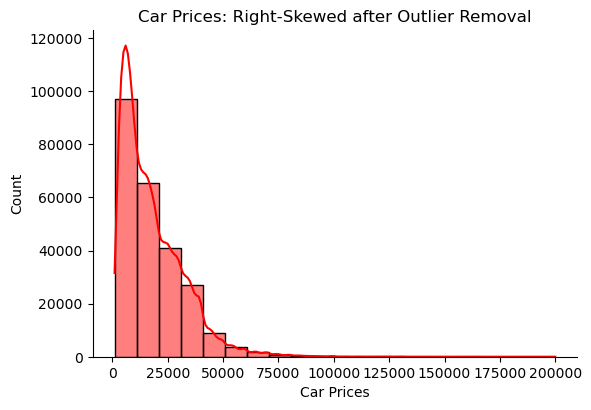

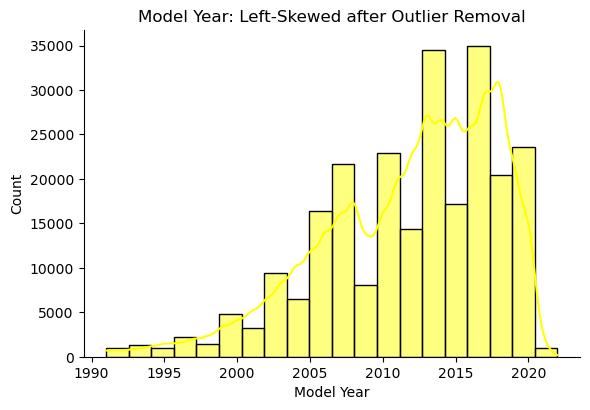

In [334]:
sns.displot(dataset_clean['price'], bins=20, color='red', kde=True, height=4, aspect=1.5)
plt.xlabel("Car Prices")
plt.title("Car Prices: Right-Skewed after Outlier Removal")

sns.displot(dataset_clean['year'],bins=20,color='yellow', kde=True, height=4, aspect=1.5)
plt.xlabel("Model Year")
plt.title("Model Year: Left-Skewed after Outlier Removal")

In [336]:
dataset_clean.describe()

,price,year,odometer
count,245803.000000,245803.000000,245803.000000
mean,18107.852455,2011.830673,97612.236437
std,14314.019247,5.935982,63592.609385
min,1000.000000,1991.000000,0.000000
25%,6999.000000,2008.000000,42847.000000
50%,14500.000000,2013.000000,93915.000000
75%,25990.000000,2017.000000,140852.000000
max,199999.000000,2022.000000,363000.000000


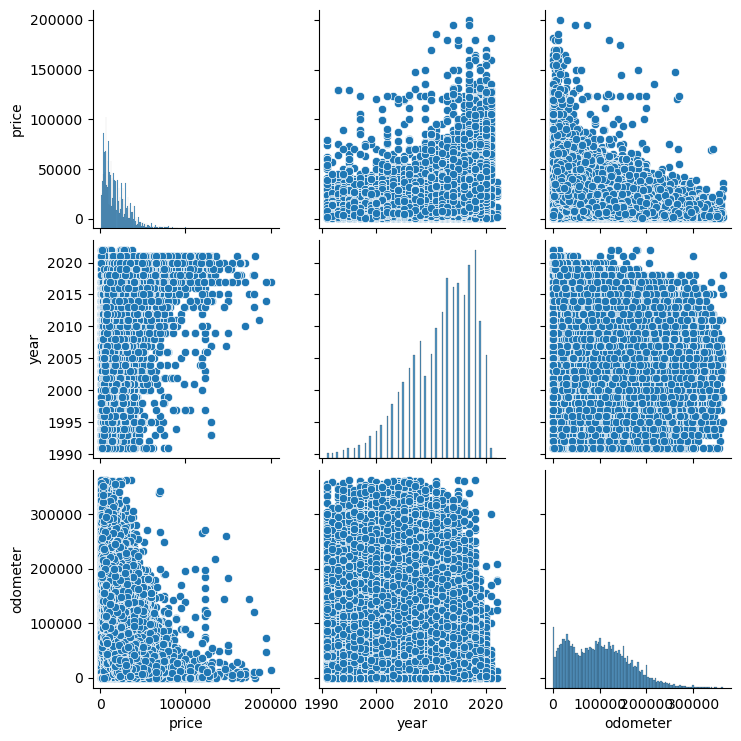

In [337]:
sns.pairplot(dataset_clean)


<Axes: >

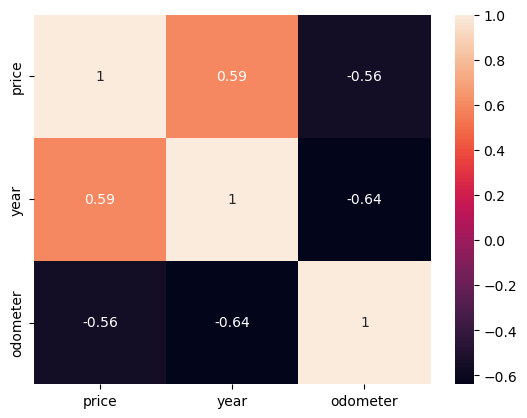

In [338]:
corr=dataset_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [342]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer, TransformedTargetRegressor

from sklearn.metrics import root_mean_squared_error

In [343]:
#BASELINE LINEAR_REGRESSION MODEL

In [344]:
X = dataset_clean.drop('price', axis = 1)
X = X.drop(['manufacturer', 'condition','cylinders','fuel','title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'], axis=1)
y = dataset_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [345]:
pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [346]:
pipe.fit(X_train, y_train)
preds_train = pipe.predict(X_train)
preds_test = pipe.predict(X_test)

base_train_mse = root_mean_squared_error(y_train, preds_train)
base_test_mse = root_mean_squared_error(y_test, preds_test)

In [347]:
print('Baseline Train LinearRegression RMSE: ', base_train_mse)
print('Baseline Test LinearRegression RMSE:  ', base_test_mse)

Baseline Train LinearRegression RMSE:  10874.08817696199
Baseline Test LinearRegression RMSE:   10851.185085595016


In [356]:
#LASSO MODEL

In [358]:
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer', 'condition','cylinders',
                                                                               'fuel','title_status', 'transmission', 
                                                                               'drive', 'size', 'type', 'paint_color', 
                                                                               'state']), remainder='passthrough')


pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', Lasso(alpha=0.5, tol=1e-2))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Lasso(alpha=0.5, tol=0.01))])

In [360]:
X = dataset_clean.drop('price', axis = 1)
y = dataset_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)
lasso_preds_train = pipe.predict(X_train)
lasso_preds_test = pipe.predict(X_test)

lasso_train_mse = root_mean_squared_error(y_train, lasso_preds_train)
lasso_test_mse = root_mean_squared_error(y_test, lasso_preds_test)

print('Train Lasso RMSE: ', lasso_train_mse)
print('Test Lasso RMSE:  ', lasso_test_mse)

Train Lasso RMSE:  7988.388722947936
Test Lasso RMSE:   7942.2087666806765


In [361]:
#RIDGE MODEL

In [362]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', Ridge(alpha=0.5))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Ridge(alpha=0.5))])

In [363]:
X = dataset_clean.drop('price', axis = 1)
y = dataset_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)
ridge_preds_train = pipe.predict(X_train)
ridge_preds_test = pipe.predict(X_test)

ridge_train_mse = root_mean_squared_error(y_train, ridge_preds_train)
ridge_test_mse = root_mean_squared_error(y_test, ridge_preds_test)

print('Train Ridge RMSE: ', ridge_train_mse)
print('Test Ridge RMSE:  ', ridge_test_mse)

Train Ridge RMSE:  7987.290680680834
Test Ridge RMSE:   7940.335011146922


In [ ]:
#LINEAREGRESSIOn MODEL

In [ ]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe

In [368]:
X = dataset_clean.drop('price', axis = 1)
y = dataset_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)
linreg_preds_train = pipe.predict(X_train)
linreg_preds_test = pipe.predict(X_test)

linreg_train_mse = root_mean_squared_error(y_train, linreg_preds_train)
linreg_test_mse = root_mean_squared_error(y_test, linreg_preds_test)

print('Train LinReg RMSE: ', linreg_train_mse)
print('Test LinReg RMSE:  ', linreg_test_mse)

Train LinReg RMSE:  7922.117969260654
Test LinReg RMSE:   7883.265969663902


In [374]:
results_df = X_train.drop(['year', 'manufacturer', 'condition','cylinders','fuel','odometer','title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'], axis=1)
results_df['price'] = y_train
results_df['Lasso'] = lasso_preds_train
results_df['Ridge'] = ridge_preds_train
results_df['LinReg'] = linreg_preds_train
results_df.head(10)

,price,Lasso,Ridge,LinReg
208950,10900,6779.920152,6797.607581,6829.574888
189716,12900,18565.176183,18535.759522,18570.810023
314633,13997,16090.504184,16067.269738,15978.541060
399544,37590,25950.124735,25886.955016,25437.706863
217572,39900,26824.100883,26784.729207,27037.447529
263766,12797,11219.238286,11093.098671,10857.074357
123281,17990,20194.359491,20166.516100,19959.107951
393484,15995,19466.212988,19582.609312,19519.325396
323074,19991,36562.612956,36784.490335,37603.291507
313471,10850,11105.494411,11131.427681,11102.514710


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# We find best features

In [378]:
from sklearn.feature_selection import SequentialFeatureSelector

In [380]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=10)),
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=10)),
                ('model', LinearRegression())])

In [ ]:
X = dataset_clean.drop('price', axis = 1)
y = dataset_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)
features_preds_train = pipe.predict(X_train)
features_preds_test = pipe.predict(X_test)

features_train_mse = root_mean_squared_error(y_train, features_preds_train)
features_test_mse = root_mean_squared_error(y_test, features_preds_test)

print('Train_LinReg Best 10 Features RMSE: ', features_train_mse)
print('Test_LinReg Best 10 Features RMSE:  ', features_test_mse)

In [383]:
features = pipe.named_steps['col_transformer'].get_feature_names_out()
sel_features = pipe.named_steps['selector'].get_feature_names_out()
indexes = []
for s in sel_features:
    indexes.append(int(s[1:]))

features[indexes]

array(['onehotencoder__manufacturer_ferrari',
       'onehotencoder__manufacturer_porsche',
       'onehotencoder__cylinders_4 cylinders',
       'onehotencoder__cylinders_8 cylinders',
       'onehotencoder__fuel_diesel', 'onehotencoder__drive_fwd',
       'onehotencoder__drive_unknown_drive', 'onehotencoder__type_pickup',
       'remainder__year', 'remainder__odometer'], dtype=object)

In [384]:
pipe.named_steps['model'].coef_

array([ 1054.97704044,  1002.6906072 , -1693.04339643,  1515.05460633,
        3449.07884765, -2841.98366427, -1509.76292338,   986.55555711,
        6691.21898732, -4101.19912268])

In [388]:
sorted_features = pd.DataFrame({'Features': features[indexes]})
sorted_features['coef'] = pipe.named_steps['model'].coef_
sorted_features['coef2'] = sorted_features['coef'].abs()
sorted_features['Features'] = sorted_features['Features'].str.replace(r'^[^_]*__(.*)', '\\1', regex=True)
sorted_features.sort_values(by='coef2', ascending=False)

,Features,coef,coef2
8,year,6691.218987,6691.218987
9,odometer,-4101.199123,4101.199123
4,fuel_diesel,3449.078848,3449.078848
5,drive_fwd,-2841.983664,2841.983664
2,cylinders_4 cylinders,-1693.043396,1693.043396
3,cylinders_8 cylinders,1515.054606,1515.054606
6,drive_unknown_drive,-1509.762923,1509.762923
0,manufacturer_ferrari,1054.977040,1054.977040
1,manufacturer_porsche,1002.690607,1002.690607
7,type_pickup,986.555557,986.555557


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
First sorted 10-features revealed: year, odometer, fuel_diesel, drive_fwd, cylinders_4 cylinders, cylinders_8 cylinders, manufacturer_ferrari, manufacturer_porsche, 8 cylinders, and type_pickup have more influence on the price